# Project Assignment 1
Selina Narain
March 31, 2023
DTSC 620
Professor Kiran Balagani


In [47]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay


In [48]:
#Loading a dataset into a dataframe
spam_dataset_dataframe = pd.read_csv("/Users/selinanarain/Desktop/DTSC 620/ProjectAssignment1/spam.csv")
print('Dataset Loaded...')

spam_dataset_dataframe.head()

Dataset Loaded...


,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [49]:
spam_dataset_dataframe.describe()
#spam_dataset_dataframe.iloc[0:3]

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


array([[<AxesSubplot: title={'center': 'make'}>,
        <AxesSubplot: title={'center': 'address'}>,
        <AxesSubplot: title={'center': 'all'}>,
        <AxesSubplot: title={'center': '3d'}>,
        <AxesSubplot: title={'center': 'our'}>,
        <AxesSubplot: title={'center': 'over'}>,
        <AxesSubplot: title={'center': 'remove'}>,
        <AxesSubplot: title={'center': 'internet'}>],
       [<AxesSubplot: title={'center': 'order'}>,
        <AxesSubplot: title={'center': 'mail'}>,
        <AxesSubplot: title={'center': 'receive'}>,
        <AxesSubplot: title={'center': 'will'}>,
        <AxesSubplot: title={'center': 'people'}>,
        <AxesSubplot: title={'center': 'report'}>,
        <AxesSubplot: title={'center': 'addresses'}>,
        <AxesSubplot: title={'center': 'free'}>],
       [<AxesSubplot: title={'center': 'business'}>,
        <AxesSubplot: title={'center': 'email'}>,
        <AxesSubplot: title={'center': 'you'}>,
        <AxesSubplot: title={'center': 'credi

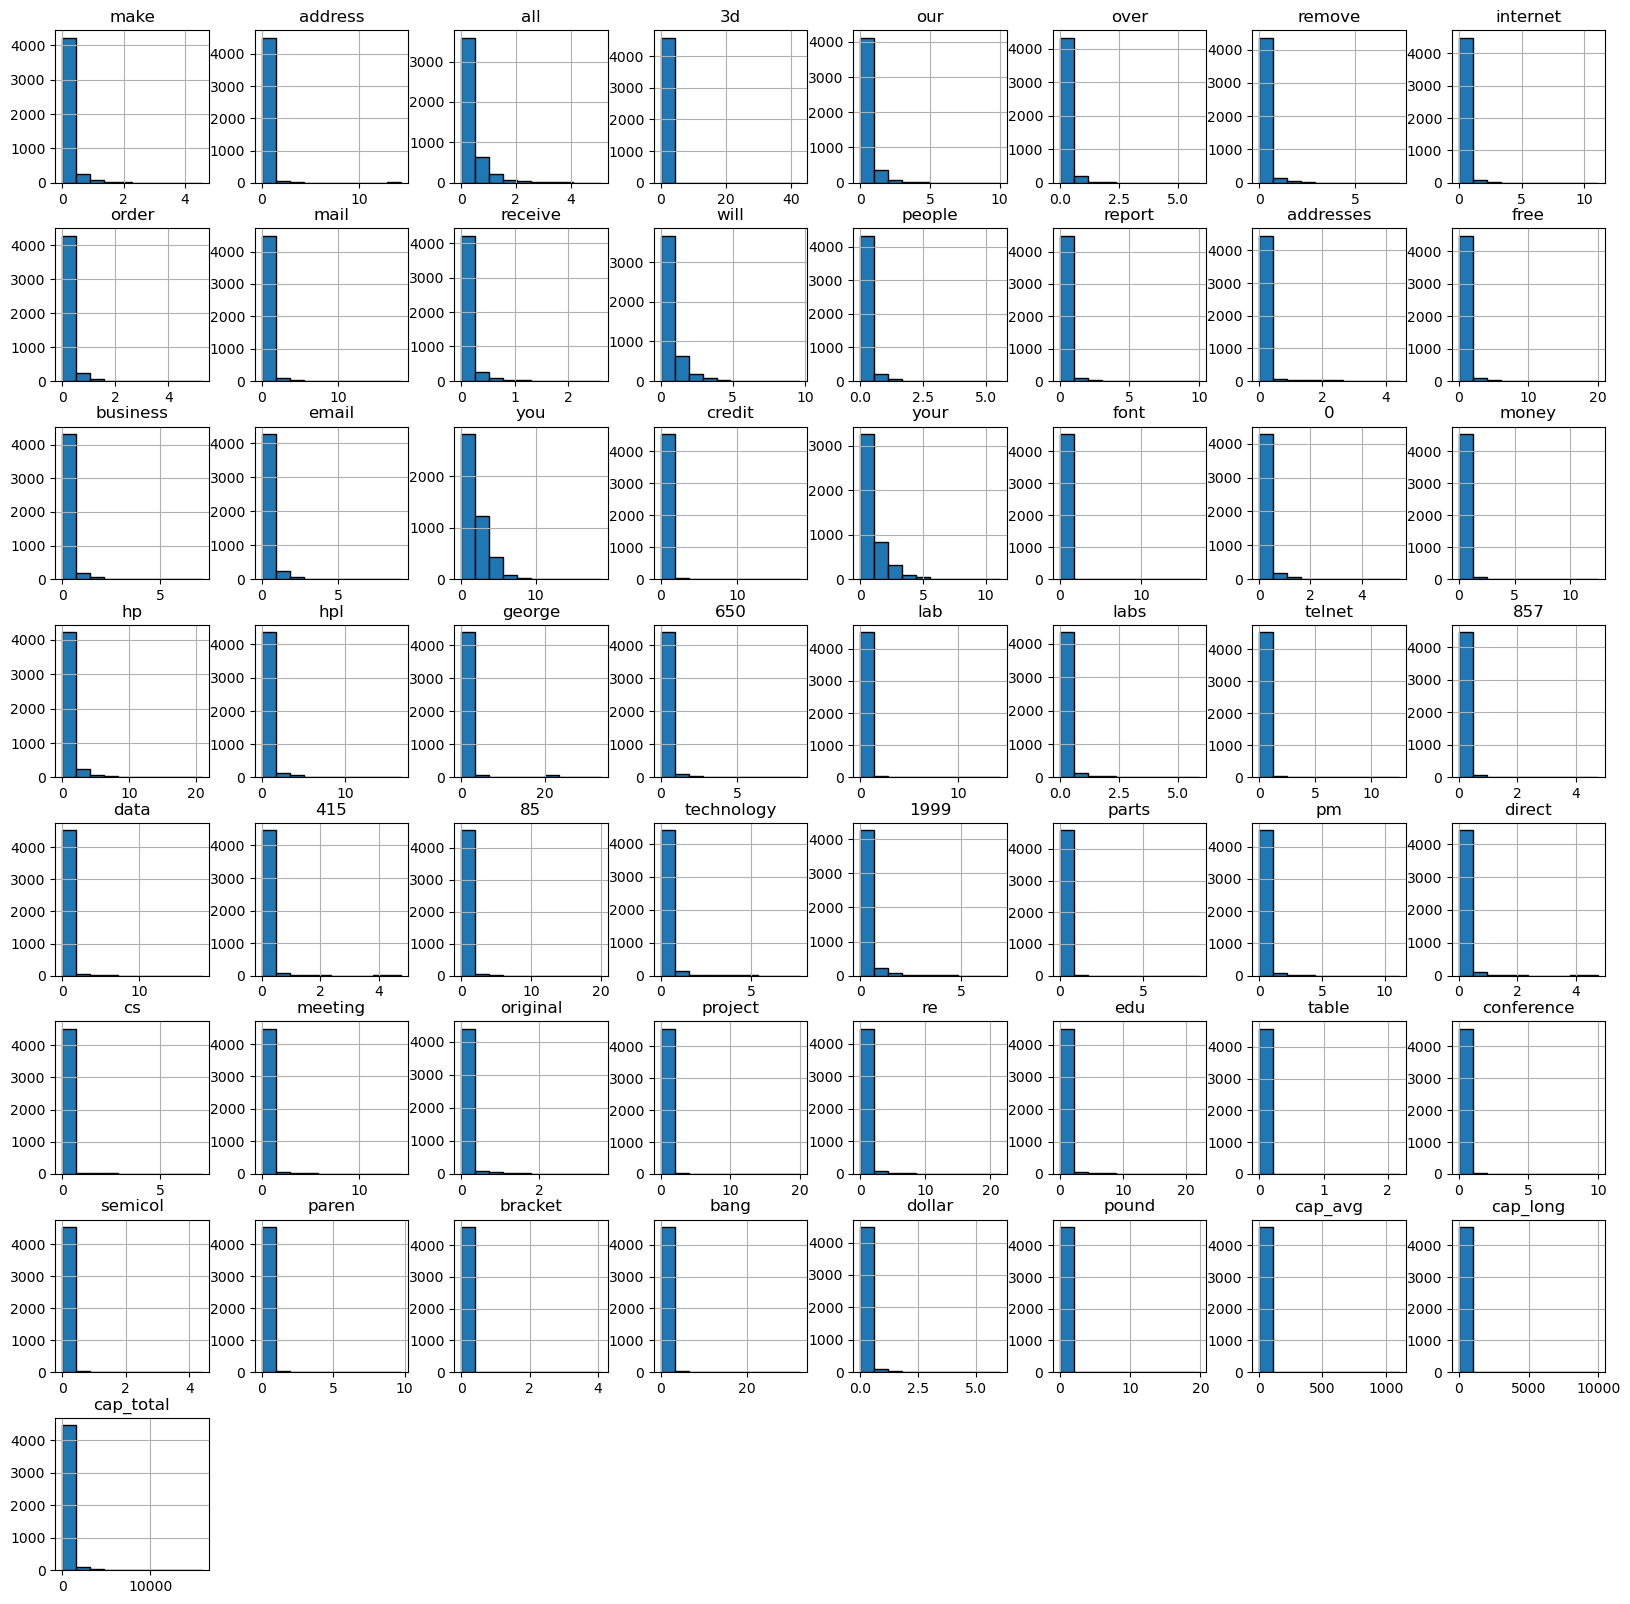

In [50]:
#Histogram of features
spam_dataset_dataframe.hist(bins=10, edgecolor="black", figsize=(20,20))

In [51]:
#Split dataset into features and target variable
feature_names = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
                'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 
                'your', 'font', '0', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', 
                '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 
                're', 'edu', 'table', 'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound', 'cap_avg', 
                'cap_long', 'cap_total']
X = spam_dataset_dataframe[feature_names] # Features
y = spam_dataset_dataframe.Class # Target variable

In [52]:
#Split df into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000/4601, random_state=42) 

In [53]:
#View training data
X_train.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
2813,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.1,0.074,0.134,0.0,0.000,0.059,0.0,2.529,26,597
2915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.439,0.0,0.000,0.219,0.0,1.911,11,65
3590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.037,0.0,0.149,0.000,0.0,10.012,251,791
1552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.344,0.000,0.0,3.250,17,52
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.000,1,5


<AxesSubplot: xlabel='make', ylabel='address'>

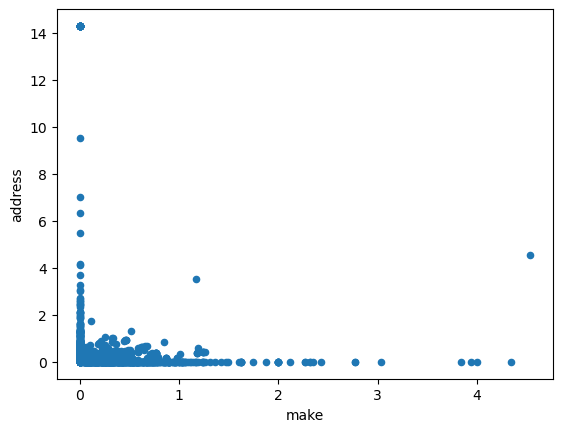

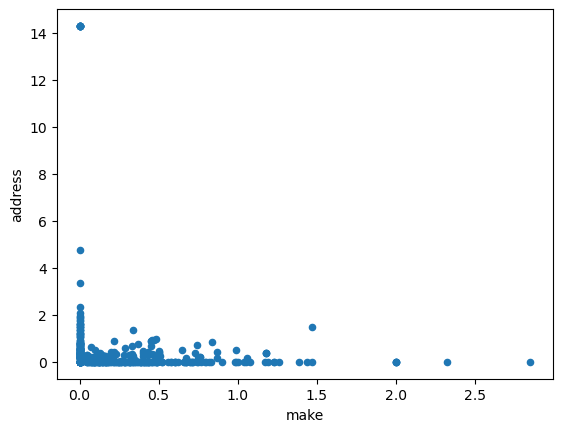

In [54]:
#Scatter plot of training and test data
X_train.plot(kind="scatter", x = "make", y = "address")
X_test.plot(kind="scatter", x = "make", y = "address")

In [55]:
#Create decision tree classifier for spam data, compute accuracy, generate confusion matrix
spam_decision_clf = DecisionTreeClassifier()
spam_decision_clf = spam_decision_clf.fit(X_train, y_train)
y_pred = spam_decision_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.897
Confusion matrix:
 [[538  59]
 [ 44 359]]


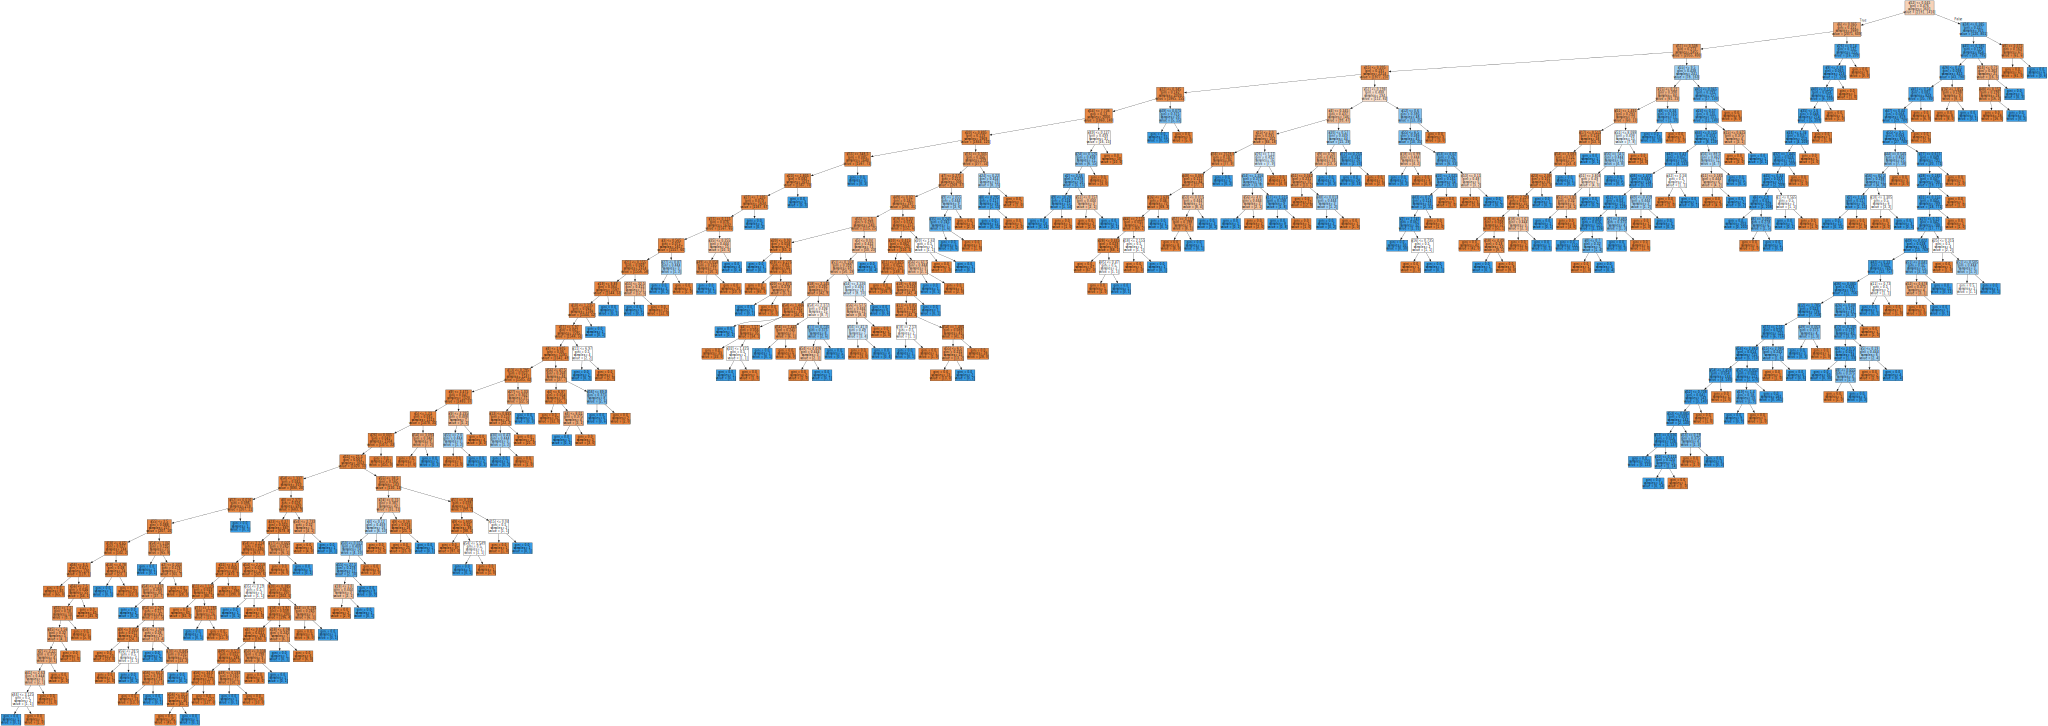

In [56]:
#Visualize decision tree
spam_DTdata = tree.export_graphviz(spam_decision_clf, filled=True)
graph = graphviz.Source(spam_DTdata)
graph


In [57]:
#Measure the quality of a split using entropy and compare accuracy
spam_decision_clf = DecisionTreeClassifier(criterion = "entropy")
spam_decision_clf = spam_decision_clf.fit(X_train, y_train)

y_pred = spam_decision_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.903
Confusion matrix:
 [[539  58]
 [ 39 364]]


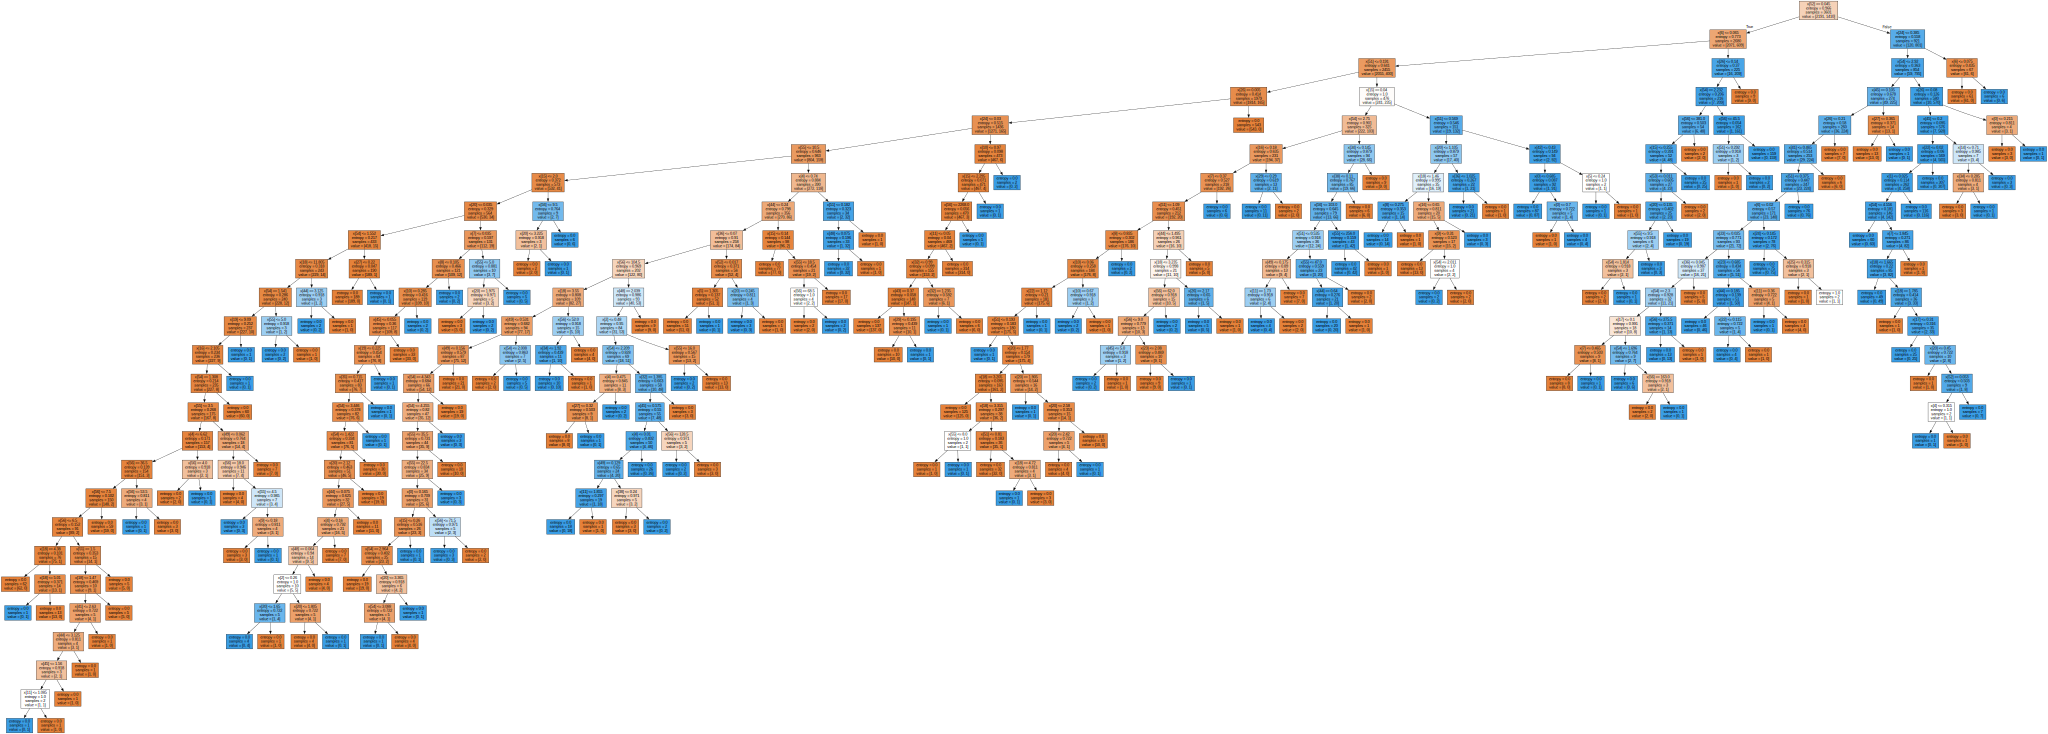

In [58]:
#Visualize decision tree
spam_DTdata = tree.export_graphviz(spam_decision_clf, filled=True)
graph = graphviz.Source(spam_DTdata)
graph


Spam Decision Tree Classifier
              precision    recall  f1-score   support

         ham       0.90      0.93      0.92       578
        spam       0.90      0.86      0.88       422

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



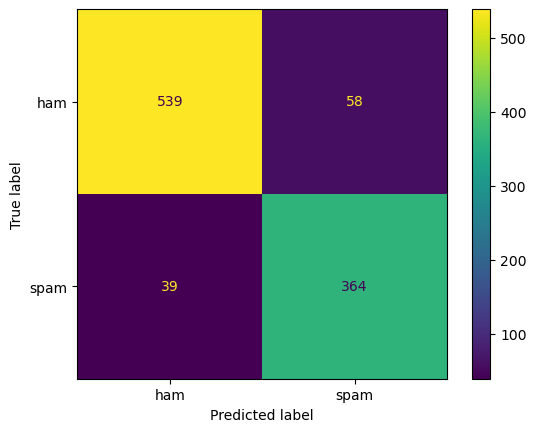

In [59]:
#Generate classification report for decision tree classifier considering entropy
print("Spam Decision Tree Classifier")

print(classification_report(y_pred, y_test))

#Based on sklearn ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=spam_decision_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam_decision_clf.classes_)

disp.plot()
plt.show()

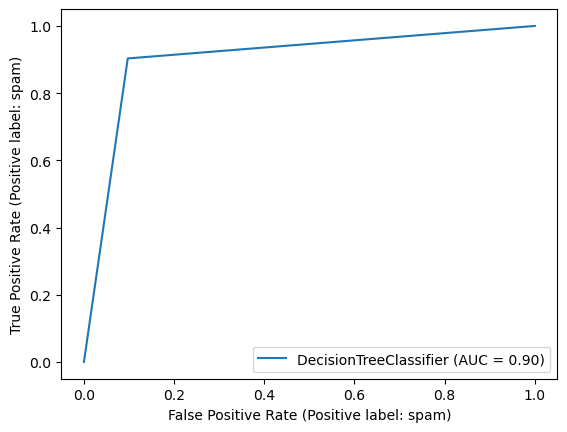

In [60]:
#Plot ROC curve
RocCurveDisplay.from_estimator(spam_decision_clf, X_test, y_test)
plt.show()

In [61]:
#RFC n_estimators = 10, accuracy score
spam_rfc_1 = RandomForestClassifier(n_estimators = 10)
spam_rfc_1.fit(X_train, y_train)
y_pred = spam_rfc_1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.934


In [62]:
#RFC n_estimators = 50, accuracy score
spam_rfc_2 = RandomForestClassifier(n_estimators = 50)
spam_rfc_2.fit(X_train, y_train)
y_pred = spam_rfc_2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.938


In [80]:
#RFC n_estimators = 100, accuracy score
spam_rfc_3 = RandomForestClassifier(n_estimators = 100)
spam_rfc_3.fit(X_train, y_train)
y_pred = spam_rfc_3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.944


In [81]:
#RFC n_estimators = 500, accuracy score
spam_rfc_4 = RandomForestClassifier(n_estimators = 500)
spam_rfc_4.fit(X_train, y_train)
y_pred = spam_rfc_4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.937


In [65]:
#RFC n_estimators = 1000, accuracy score
spam_rfc_5 = RandomForestClassifier(n_estimators = 1000)
spam_rfc_5.fit(X_train, y_train)
y_pred = spam_rfc_5.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.943


In [82]:
#RFC n_estimators = 5000, accuracy score
spam_rfc_5 = RandomForestClassifier(n_estimators = 5000)
spam_rfc_5.fit(X_train, y_train)
y_pred = spam_rfc_5.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.943


In [67]:
#RFC n_estimators = 100 and max_features='auto', accuracy score
spam_rfc_3_auto = RandomForestClassifier(n_estimators = 100, max_features='auto')
spam_rfc_3_auto.fit(X_train,y_train)
y_pred = spam_rfc_3_auto.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/Users/selinanarain/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.947


In [68]:
#RFC n_estimators = 100 and max_features='sqrt', accuracy score
spam_rfc_3_sqrt = RandomForestClassifier(n_estimators = 100, max_features='sqrt')
spam_rfc_3_sqrt.fit(X_train,y_train)
y_pred = spam_rfc_3_sqrt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.946


In [69]:
#RFC n_estimators = 100 and max_features='log2', accuracy score
spam_rfc_3_log2 = RandomForestClassifier(n_estimators = 100, max_features='log2')
spam_rfc_3_log2.fit(X_train,y_train)
y_pred = spam_rfc_3_log2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.941


In [89]:
#Best accuracies came from spam_rfc_3_auto classifier. Re-initialize to compute y_pred and compute accuracy
best_spam_rfc = spam_rfc_3_auto
best_spam_rfc.fit(X_train,y_train)
y_pred = best_spam_rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/Users/selinanarain/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.947


Spam Random Forest Classifier
              precision    recall  f1-score   support

         ham       0.95      0.95      0.95       598
        spam       0.93      0.93      0.93       402

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



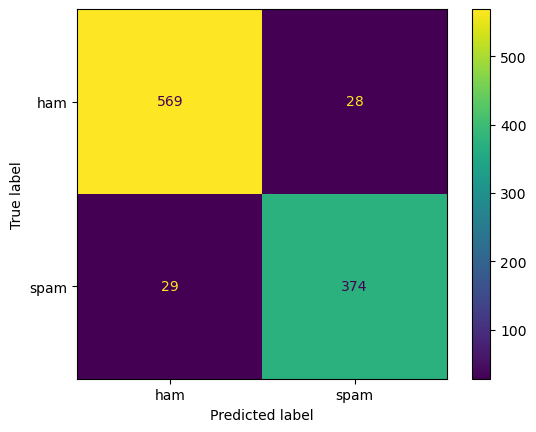

In [71]:
#Generate classification report for random forest classifier considering entropy
print("Spam Random Forest Classifier")

print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_test, y_pred, labels=best_spam_rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_spam_rfc.classes_)

disp.plot()
plt.show()

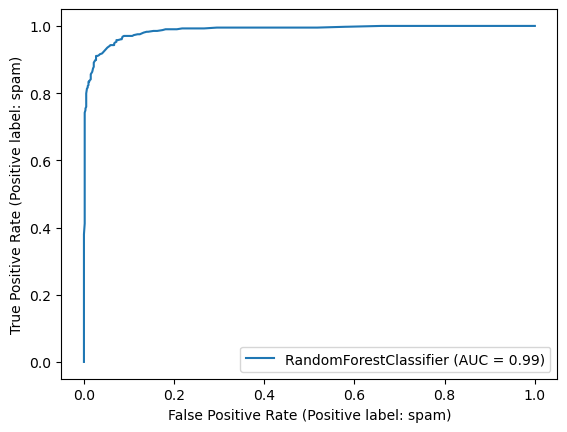

In [72]:
#Plot ROC curve
RocCurveDisplay.from_estimator(best_spam_rfc, X_test, y_test)
plt.show()

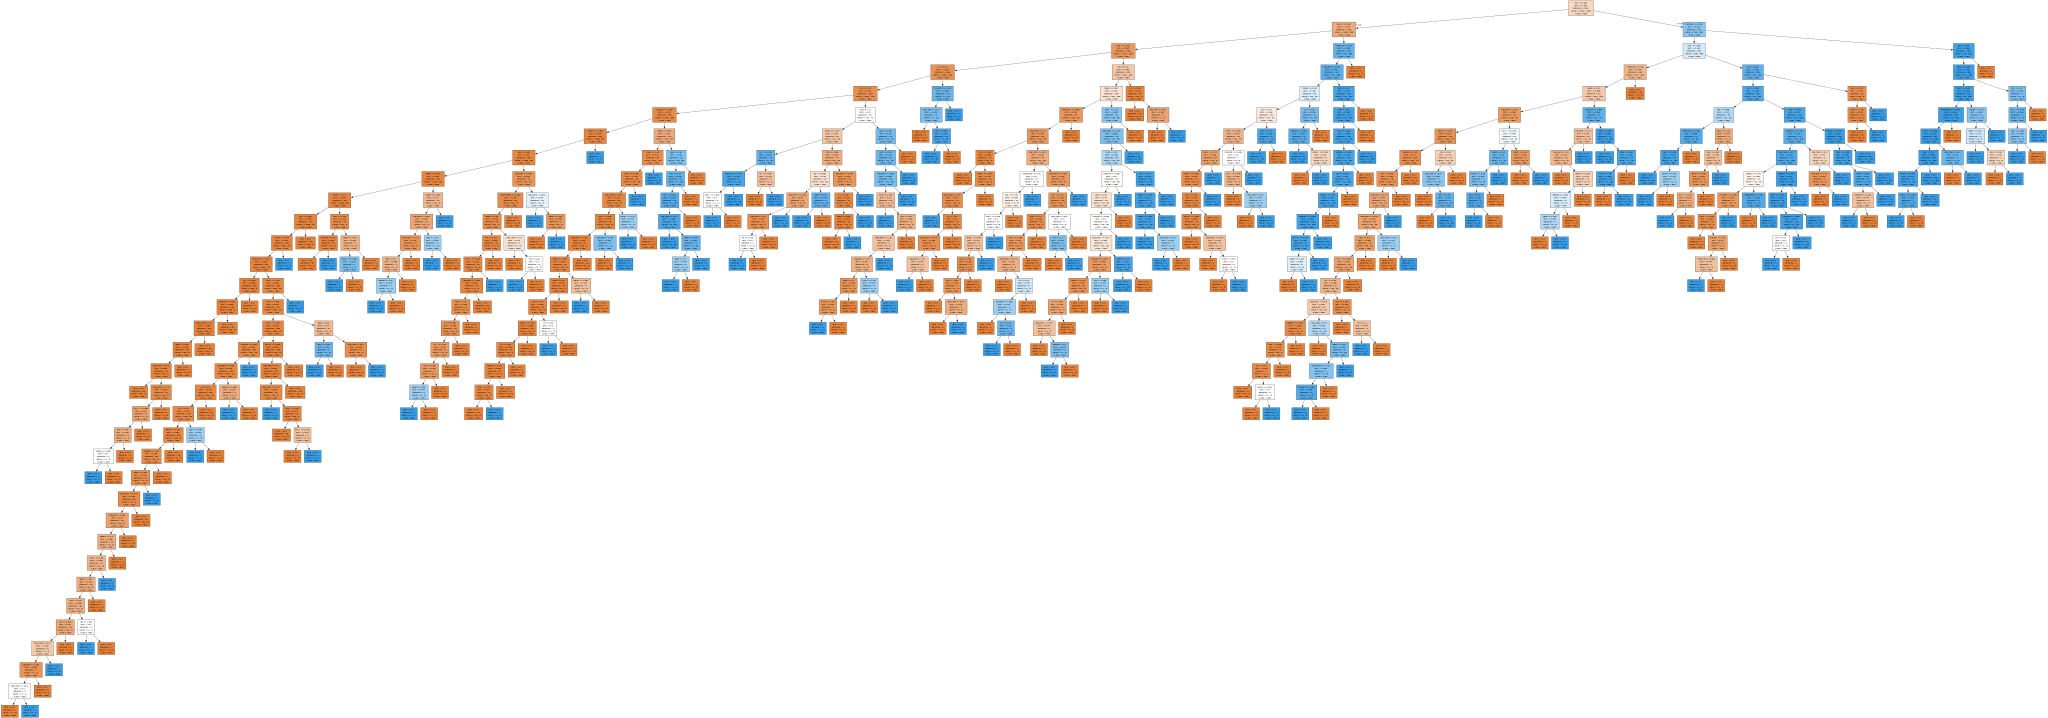

In [73]:
#Visualize Individual Decision Trees in Best Random Forest Classifier
spam_RFCdata = tree.export_graphviz(best_spam_rfc.estimators_[99],
                                    feature_names=feature_names,
                                    class_names=y,
                                    filled=True,
                                    impurity=True)
graph = graphviz.Source(spam_RFCdata)
graph